## Group member 6: feature engineering - dimension reduction (pca)

### Subtask:
Apply Principal Component Analysis (PCA) to the numerical features (or the selected features from Member 5) to reduce the dimensionality of the dataset while retaining most of the variance. Determine the optimal number of components to keep. Display the results of the PCA, perhaps visualizing the explained variance ratio.


**Reasoning**:
Apply PCA to the selected features, analyze the explained variance, choose the optimal number of components, and perform dimensionality reduction.



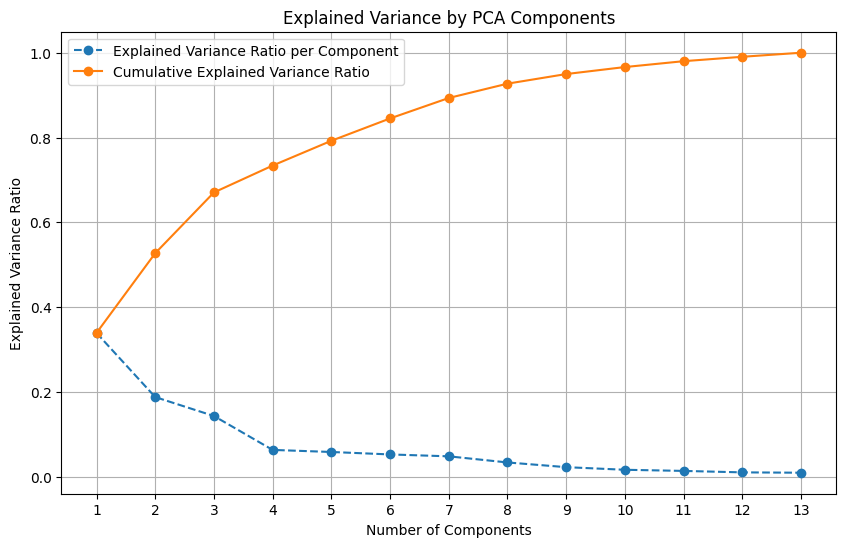


Optimal number of components to retain 95% variance: 10

Shape of original feature set for PCA (X_pca): (5110, 13)
Shape of reduced feature set after PCA (X_pca_reduced): (5110, 10)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select the features to be used for PCA
# Use the selected_features list from Member 5
X_pca = X[selected_features]

# Instantiate PCA without specifying n_components to analyze explained variance
pca = PCA()

# Fit the PCA model to the X_pca data
pca.fit(X_pca)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio for each component and the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', label='Explained Variance Ratio per Component')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.legend()
plt.show()

# Determine the optimal number of components to keep (e.g., retaining 95% of the variance)
# Find the number of components that explain at least 95% of the variance
n_components_optimal = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nOptimal number of components to retain 95% variance: {n_components_optimal}")

# Instantiate a new PCA object with the chosen number of components
pca_reduced = PCA(n_components=n_components_optimal)

# Fit and transform the X_pca data to get the reduced-dimensionality data
X_pca_reduced = pca_reduced.fit_transform(X_pca)

# Display the shape of the original feature set for PCA and the reduced feature set
print(f"\nShape of original feature set for PCA (X_pca): {X_pca.shape}")
print(f"Shape of reduced feature set after PCA (X_pca_reduced): {X_pca_reduced.shape}")

## Splitting Data into Training and Testing Sets

This section splits the final processed dataset (`df_final_pca`) into training and testing sets to prepare for model training.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# The target variable 'stroke' is the last column in df_final_pca
X_final = df_final_pca.drop('stroke', axis=1)
y_final = df_final_pca['stroke']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)

Shape of training features (X_train): (4088, 10)
Shape of testing features (X_test): (1022, 10)
Shape of training target (y_train): (4088,)
Shape of testing target (y_test): (1022,)
